## 1) Promedio y desvío estándar

In [1]:
import pandas as pd

In [2]:
data_spotify=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

Video AE4

In [8]:
data_pop_rap1=data_spotify[data_spotify['playlist_genre'].isin(['pop', 'rap', 'latin'])]
data_pop_rap2=data_pop_rap1[['playlist_genre','duration_ms']]

In [9]:
data_pop_rap2.groupby('playlist_genre').mean()/1000 # duración en segundos

,duration_ms
playlist_genre,
latin,216.863447
pop,217.768104
rap,214.163889


In [10]:
data_pop_rap2.groupby('playlist_genre').std()/1000

,duration_ms
playlist_genre,
latin,48.401258
pop,45.312946
rap,60.265287


Promedios muy parecidos... pero desvíos estandares no "tan similares".

**¿Hay alguna manera de medirlo mas estandarizado?**

Lectura recomendada del análisis del error en ML: [Conociendo el error | Libro Vivo de Ciencia de Datos](https://librovivodecienciadedatos.ai/desempe%C3%B1o-modelo.html#conociendo_el_error)

## 2)Test de hipótesis

#### Un poco de teoría:

La prueba (test) **t-student**, se usa para determinar si los promedios entre dos muestras son realmente diferentes (como un juez imparcial).

En la t-student comparamos 2 muestras de una población desconocida (no tenemos todos los temas). Las muestras son al azar e independientes.

Si las muestras están relacionadas (ej mismo paciente con un medicamento), se usa: "Paired Sample T-Test". No tan común en ML.


In [15]:
d_pop=data_pop_rap1.query("playlist_genre=='pop'")['duration_ms'].rename('duration_pop')

d_rap=data_pop_rap2.query("playlist_genre=='rap'")['duration_ms'].rename('duration_rap')

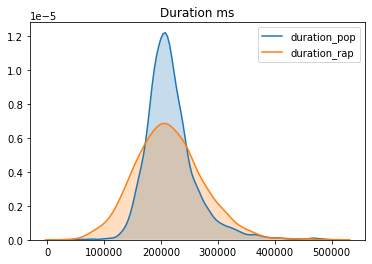

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(d_pop, shade=True)
sns.kdeplot(d_rap, shade=True)

p=plt.title("Duration ms")

- Hipótesis nula: µa = µb (el promedio de ambas muestras es igual)

- Hipótesis alternativa: µa ≠ µb (el promedio de ambas muestras no es igual) 

Nivel de significancia: 0.05

In [18]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(d_pop, d_rap, equal_var = False)

print("p-value: {0}".format(round(p_value, 6)))

p-value: 0.000325


Como el p-value de `0.000325` es menor que el nivel de significancia **alpha=0.05**, podemos rechazar la hipótesis nula y aceptar la hipótesis alternativa de que la diferencia de los promedios en ambas muestras no es 0.



Asumimos que la varianza en las muestras no es la misma: `usevar='unequal'`

Regla: Si p-value < alpha →  rechazo la hipótesis nula (rechazo que H0: la diferencia entre las medias es 0)

### 2) Intervalo de confianza del parámetro

In [19]:
import numpy as np, statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(d_pop), sms.DescrStatsW(d_rap))

print(cm.tconfint_diff(usevar='unequal'))

(1639.21094073593, 5569.219240678599)


Notar que el intervalo de confianza no contiene al 0.

Animación de seeing the theory que aparece en el video: https://seeing-theory.brown.edu/frequentist-inference/es.html#section2

## Otro caso!

In [20]:
data_2=data_spotify[data_spotify['playlist_genre'].isin(['pop', 'latin'])]
data_2=data_2[['playlist_genre','duration_ms']]

In [21]:
d_pop=data_2.query("playlist_genre=='pop'")['duration_ms']
d_latin=data_2.query("playlist_genre=='latin'")['duration_ms']

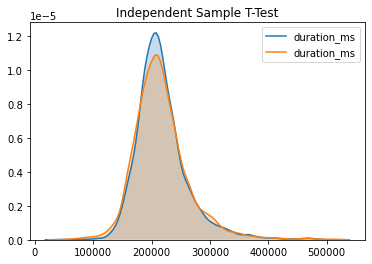

In [22]:
sns.kdeplot(d_pop, shade=True)
sns.kdeplot(d_latin, shade=True)

p=plt.title("Independent Sample T-Test")

In [26]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(d_pop, d_latin, equal_var = False)

print("p-value: {0} | t-statistic: {1}".format(round(p_value, 6), round(t_stat, 5)))

p-value: 0.319948 | t-statistic: 0.99461


In [27]:
import numpy as np, statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(d_pop), sms.DescrStatsW(d_latin))

print(cm.tconfint_diff(usevar='unequal'))

(-878.2482287572063, 2687.5628012869574)


#### Comentarios sobre test de hipótesis y aspectos que no cubrimos:
    
- Test de normalidad (normalmente, no son normales las curvas) 
- Tamaño de la muestra (normalmente son > 30)
- Conocer el promedio y varianza de la población (normalmente no se conoce)